## Aprendizado Não Supervisionado - Agrupamento de Dados
#### Prof. Thomas da Silva Paula

### DBSCAN - Demo 1

* Utilização do algoritmo DBSCAN com diferentes parâmetros.
* Base de dados sintéticas
* Algumas limitações

In [4]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

### Criar base de dados sintética

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

,x,y,label
0,7.415416,-5.293543,2
1,-3.898435,-0.410129,0
2,-6.065070,-0.514075,0
3,-7.980452,8.115292,3
4,10.479860,-0.900095,5


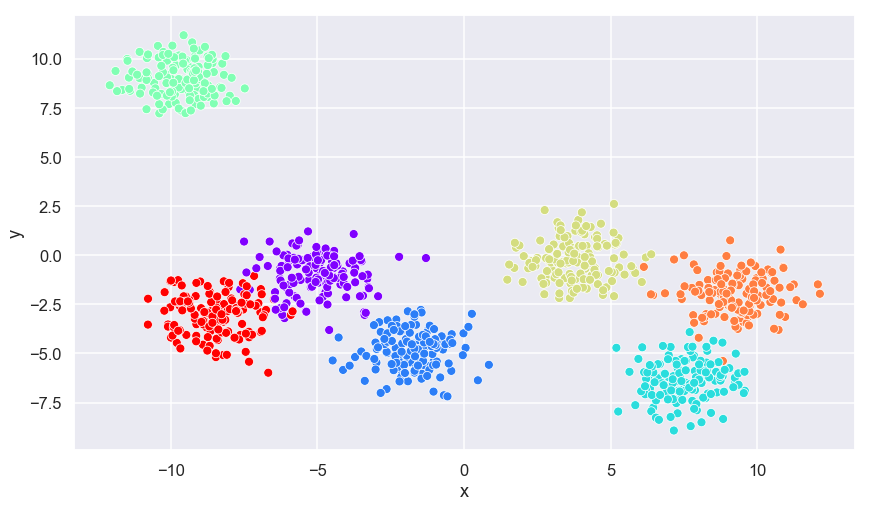

In [5]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### Testar DBSCAN

In [6]:
def train_and_plot(data, eps=0.5, min_samples=5):
    
    # Copiamos os dados e removemos a coluna label 
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

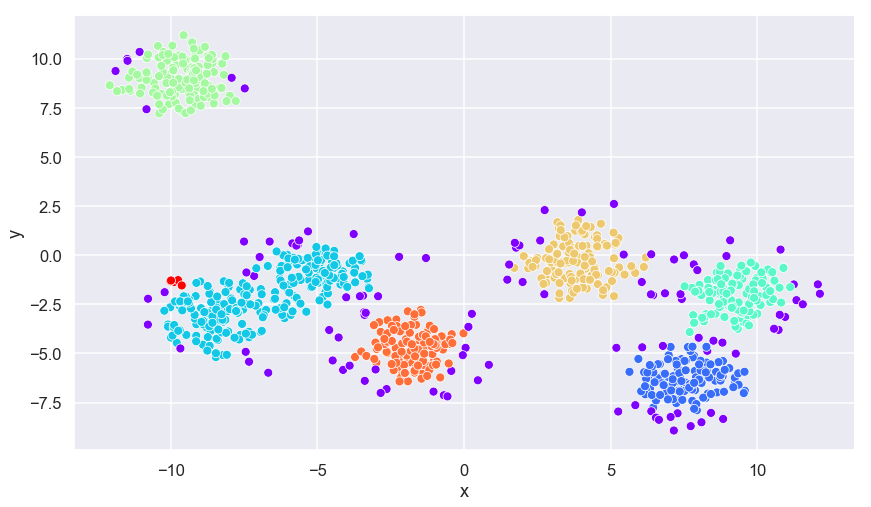

In [8]:
eps = 0.5
min_samples = 5

train_and_plot(df, eps, min_samples)

### Execução em diferentes bases de dados

In [9]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

,x,y,label
0,3.775776,-2.551136,4
1,4.798597,-1.459384,5
2,3.910070,1.590275,0
3,5.554648,1.009466,0
4,-10.997360,2.443557,6


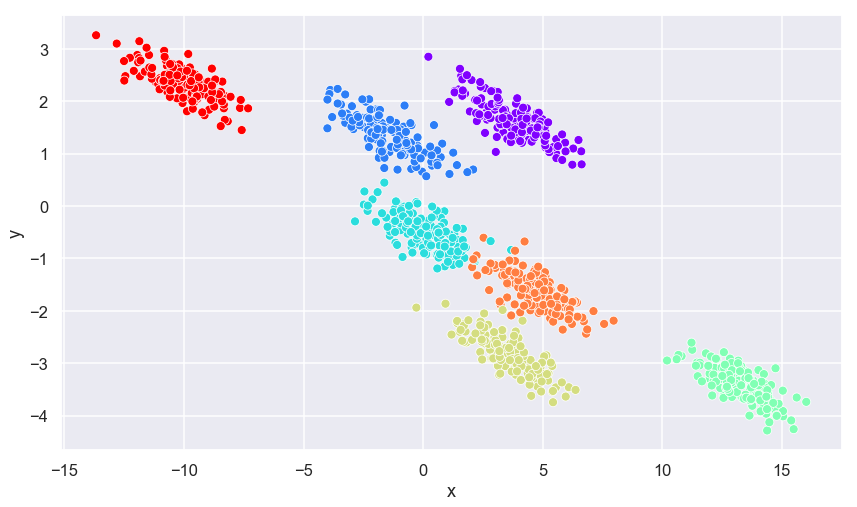

In [11]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

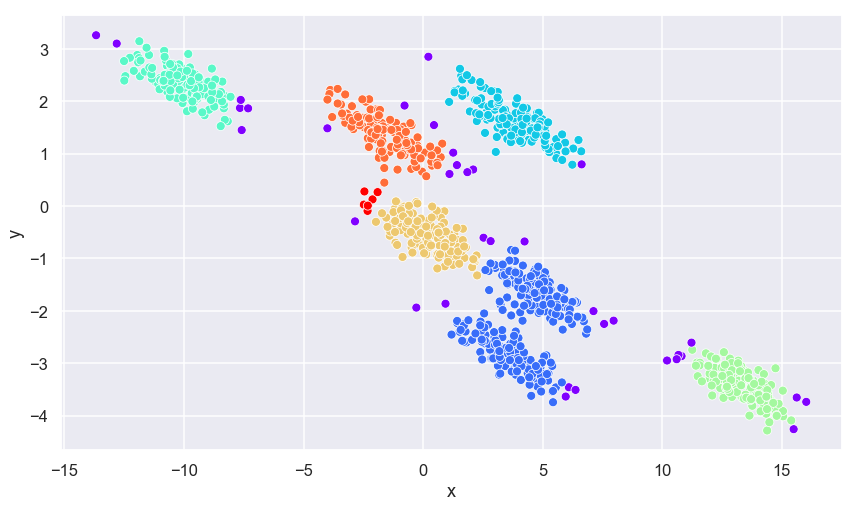

In [21]:
train_and_plot(df_transformed, eps=0.4, min_samples=5)

In [22]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

,x,y,label
0,0.449533,-0.403077,1
1,1.860595,0.011092,1
2,1.842407,-0.086292,1
3,1.395956,-0.438878,1
4,0.479125,0.926415,0


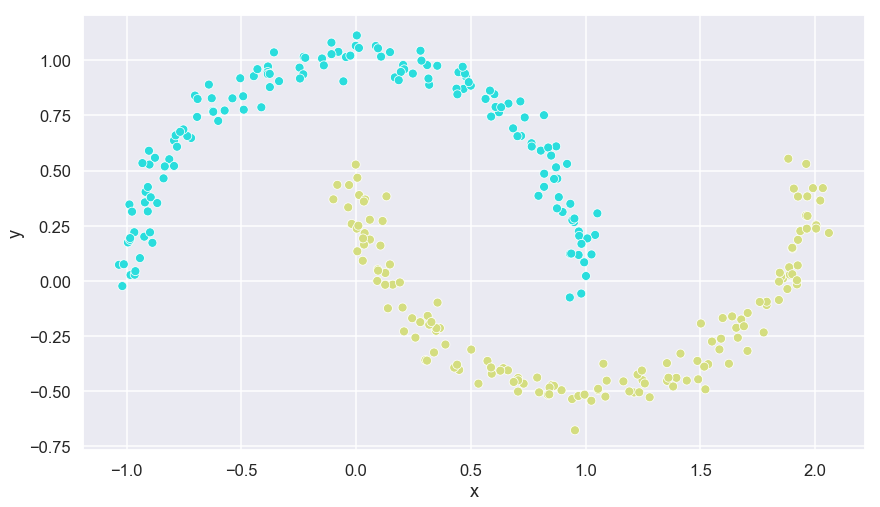

In [23]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

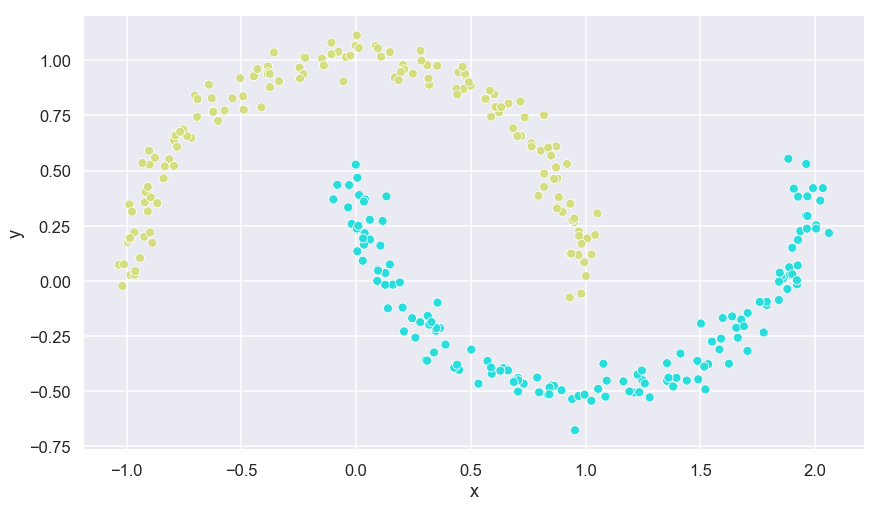

In [28]:
train_and_plot(df_moon, eps=0.3, min_samples=5)

In [29]:
X, y = make_blobs(1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)

df_varied = pd.DataFrame(X, columns=['x', 'y'])
df_varied['label'] = y

df_varied.head()

,x,y,label
0,-6.111197,1.471531,1
1,-7.496654,0.913425,1
2,-10.844898,-7.553523,0
3,-4.543377,-2.135686,1
4,-1.913821,-0.034780,1


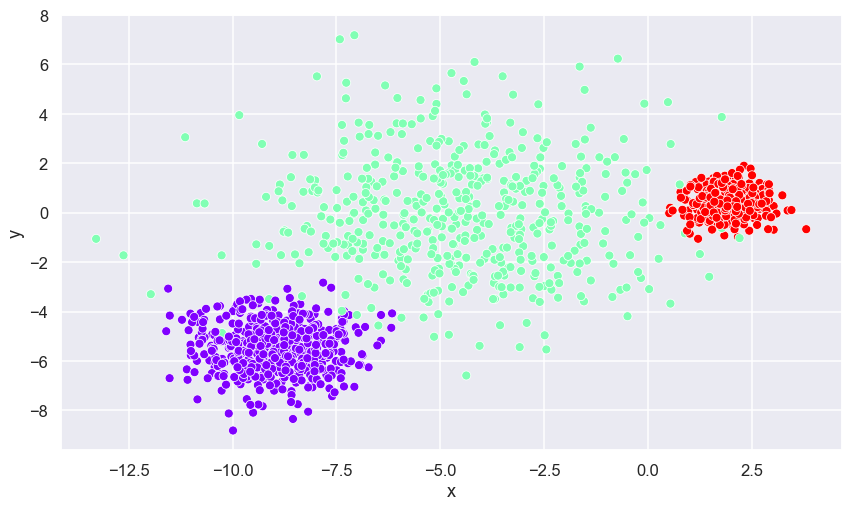

In [30]:
_ = sns.scatterplot(x='x', y='y', data=df_varied, hue='label', palette='rainbow', legend=False)

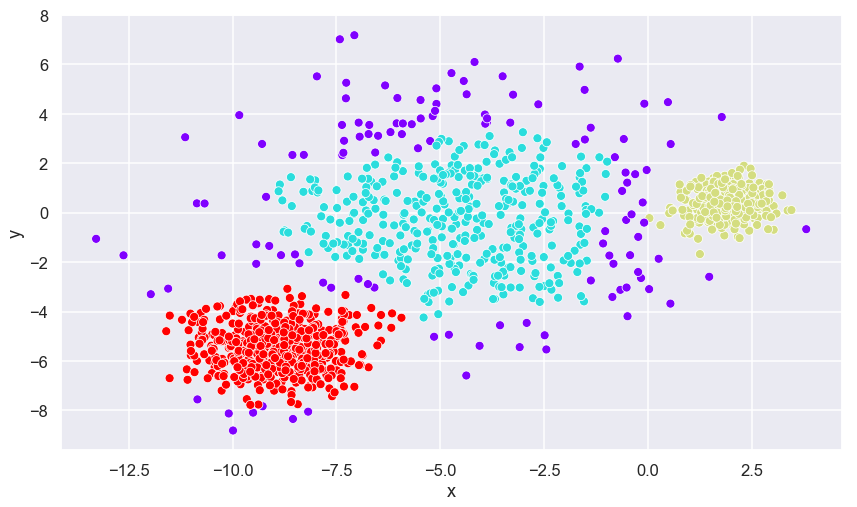

In [52]:
train_and_plot(df_varied, eps=0.65, min_samples=9)

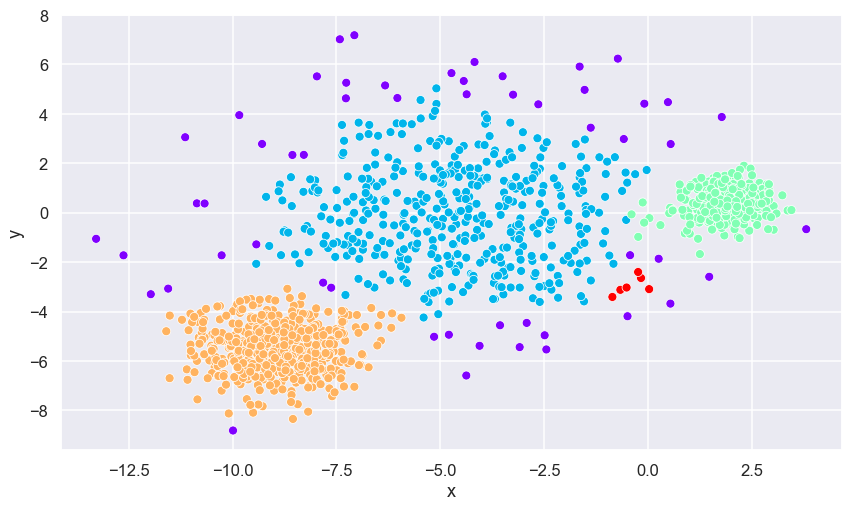

In [71]:
train_and_plot(df_varied, eps=0.7, min_samples=6)